In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install mendeleev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 47.9 MB/s eta 0:00:00


In [3]:
pip install bilby

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.0 MB/s eta 0:00:00


In [4]:
pip install pymultinest==2.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.6 MB/s eta 0:00:00


In [5]:
pip install juliet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 21.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import math
import sys
import numpy as np
import pandas as pd
from numpy import linspace, arange, zeros
from matplotlib.pylab import plt
from mendeleev import element
from bilby import result
import bilby
import seaborn as sns

In [7]:
label = 'ldm'
outdir = 'outdir'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)

In [8]:
A, delta = np.loadtxt('opt.dat',usecols=(0,1), unpack= True)

az = np.vstack((A,delta))
x = az

data = delta
ndata = len(data)
P = open('results.out','w')
print('ndata=',ndata, file=P)

In [9]:
def model(C,alpha):
    a=az[0,:]
    delta=az[1,:]




    avgdelta =  C*(a)**(-alpha)
    return avgdelta

In [10]:
injection_parameters = dict(C=4.66, alpha=0.31)
n = len(delta)
sigma = np.random.normal(1, 0.01, n)
sigma = 3.075

In [11]:
likelihood = bilby.likelihood.GaussianLikelihood(az, data, model,
sigma)

In [12]:
priors = dict()
priors['C'] = bilby.core.prior.Uniform(4,5 , '$C$',unit='MeV')
priors['alpha'] = bilby.core.prior.Uniform(0,0.4, '$alpha$',unit='MeV')

In [13]:
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', nlive=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)
result.plot_corner(priors=True,label_kwargs={"fontsize": 25},title_kwargs=dict(fontsize=20),max_n_ticks=3,smooth=1.0)
result.plot_marginals()
print( result.log_evidence, result.log_evidence_err,
            np.log(result.occam_factor(priors)))

10:29 bilby INFO    : Running for label 'ldm', output will be saved to 'outdir'
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
10:29 bilby INFO    : Analysis priors:
10:29 bilby INFO    : C=Uniform(minimum=4, maximum=5, name='$C$', latex_label='$C$', unit='MeV', boundary=None)
10:29 bilby INFO    : alpha=Uniform(minimum=0, maximum=0.4, name='$alpha$', latex_label='$alpha$', unit='MeV', boundary=None)
10:29 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
10:29 bilby INFO    : Analysis likelihood noise evidence: nan
10:29 bilby INFO    : Single likelihood evaluation took 2.539e-04 s
10:29 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 500, 'bound': 'live', 'sample': 'unif', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'npdim': None, 'rstate': None, 'queue_size': 1, '

1it [00:00, ?it/s]

10:30 bilby INFO    : Written checkpoint file outdir/ldm_resume.pickle
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImpo

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

-83102.81272876519 0.18793572251985738 -17.2152239473683


In [14]:
C_fit=result.get_one_dimensional_median_and_error_bar('C')
C1 = C_fit.median
alpha_fit=result.get_one_dimensional_median_and_error_bar('alpha')
alpha1 = alpha_fit.median

print(C1,alpha1)
data_fit = model(C1,alpha1)

4.5116454427875645 0.3999990398476756


In [15]:
cov_mat = result.covariance_matrix
nrow,ncol=np.shape(cov_mat)
print('row and columns',nrow,ncol)
corr=np.empty((nrow,ncol))
for i in range(0,nrow):
    for j in range(0,ncol):
        corr[i][j]=cov_mat[i][j] /np.sqrt(cov_mat[i][i]*cov_mat[j][j])
#output=open('results.out','w')
np.set_printoptions(precision=3)
#print(corr,file=output)
#print('Correlationmatrix',file=P)
#print(corr,file=P)
#utput.close()
print(corr)

row and columns 2 2
[[1.    0.033]
 [0.033 1.   ]]


<Axes: >

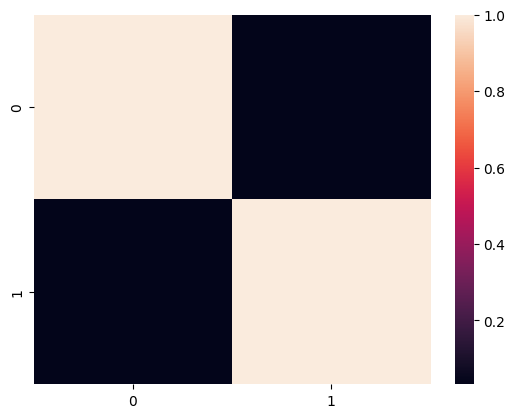

In [16]:
sns.heatmap(corr)

In [17]:
print('Parameters', file =P)
data1 = { 'C':[C_fit.median], 'plus':[C_fit.plus], 'minus':[C_fit.minus]}
data2 = { 'alpha':[alpha_fit.median], 'plus':[alpha_fit.plus], 'minus':[alpha_fit.minus]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

print(df1.to_string(index=False),file=P)
print(df2.to_string(index=False),file=P)


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
H=open('fit.out','w')

data3={'C':C, 'alpha':alpha, 'BE_EXP':BE_EXP, 'BE_FIT':data_fit}
df=pd.DataFrame(data3)
print(df.to_string(index=False),file=H)
H.close()

NameError: ignored

In [18]:
def model(az,a_v,a_s,a_a,a_c,a_p):
    a=az[0,:]
    z=az[1,:]
    a13 = pow(a,0.3333)
    zz1 = z*z
    nz = a -2*z
    nz2 = pow(nz , 2.0)
    i=0

    x=0




    deltaavg=
    return deltaavg

SyntaxError: ignored